In [57]:
import pandas as pd

In [58]:
preambles = pd.read_csv("/Users/meganvanderwiele/Downloads/DS 4002/preambles_data.csv")

In [59]:
preambles.head(10)

,C ountry,P reamble
0,Austria 2013,Chapter I General Provisions. European UnionA...
1,Sri Lanka 2015,"Motives for writing constitution, Source of c..."
2,Tanzania 2005,"Motives for writing constitution, Preamble ..."
3,Bahamas 1973,"Motives for writing constitution, God or othe..."
4,France 2008,Preamble The French people solemnly proclaim ...
5,Mauritania 2012,PreamblePreambleGod or other deitiesTrusting i...
6,Serbia 2006,"Preamble, Source of constitutional authority,..."
7,Bolivia 2009,"Motives for writing constitution, Preamble, ..."
8,Poland 2009,"God or other deities, Preamble, Motives for wr..."
9,Rwanda 2015,"Source of constitutional authority, Motives fo..."


In [60]:
preambles = preambles.rename(columns={'C ountry': 'Country', 'P reamble': 'Preamble'})[['Country', 'Preamble']]

In [61]:
preambles.head()


,Country,Preamble
0,Austria 2013,Chapter I General Provisions. European UnionA...
1,Sri Lanka 2015,"Motives for writing constitution, Source of c..."
2,Tanzania 2005,"Motives for writing constitution, Preamble ..."
3,Bahamas 1973,"Motives for writing constitution, God or othe..."
4,France 2008,Preamble The French people solemnly proclaim ...


**Function to remove stop words. This can work with any new excel file**

In [62]:
stop_words = set([
    "the", "and", "or", "for", "to", "of", "in", "on", "with", "at", "by", "from", "as", "an", "a", 
    "this", "that", "these", "those", "is", "was", "are", "were", "be", "been", "being", "it", "its", 
    "he", "she", "they", "them", "his", "her", "their", "we", "us", "our", "you", "your", "yours"
])

# function to remove stop words from preambles
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()  #splits text into words
        filtered_words = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    return text

# Apply function to the 'Preamble' column
preambles['Preamble Cleaned'] = preambles['Preamble'].apply(remove_stopwords)


In [63]:
preambles.head(10)


,Country,Preamble,Preamble Cleaned
0,Austria 2013,Chapter I General Provisions. European UnionA...,Chapter I General Provisions. European UnionA....
1,Sri Lanka 2015,"Motives for writing constitution, Source of c...","Motives writing constitution, Source constitut..."
2,Tanzania 2005,"Motives for writing constitution, Preamble ...","Motives writing constitution, Preamble Preambl..."
3,Bahamas 1973,"Motives for writing constitution, God or othe...","Motives writing constitution, God other deitie..."
4,France 2008,Preamble The French people solemnly proclaim ...,Preamble French people solemnly proclaim attac...
5,Mauritania 2012,PreamblePreambleGod or other deitiesTrusting i...,PreamblePreambleGod other deitiesTrusting omni...
6,Serbia 2006,"Preamble, Source of constitutional authority,...","Preamble, Source constitutional authority, Gen..."
7,Bolivia 2009,"Motives for writing constitution, Preamble, ...","Motives writing constitution, Preamble, Source..."
8,Poland 2009,"God or other deities, Preamble, Motives for wr...","God other deities, Preamble, Motives writing c..."
9,Rwanda 2015,"Source of constitutional authority, Motives fo...","Source constitutional authority, Motives writi..."


**Seperating the Country and the Year**

In [64]:
preambles[['Country Name', 'Year']] = preambles['Country'].str.rsplit(' ', n=1, expand=True)

preambles = preambles[['Country Name', 'Year', 'Preamble', 'Preamble Cleaned']]
preambles.head()


,Country Name,Year,Preamble,Preamble Cleaned
0,Austria,2013,Chapter I General Provisions. European UnionA...,Chapter I General Provisions. European UnionA....
1,Sri Lanka,2015,"Motives for writing constitution, Source of c...","Motives writing constitution, Source constitut..."
2,Tanzania,2005,"Motives for writing constitution, Preamble ...","Motives writing constitution, Preamble Preambl..."
3,Bahamas,1973,"Motives for writing constitution, God or othe...","Motives writing constitution, God other deitie..."
4,France,2008,Preamble The French people solemnly proclaim ...,Preamble French people solemnly proclaim attac...


**Create a new column with the region that a country is in for further analysis if needed**

In [65]:
import pycountry_convert as pc

def get_region(country_name):
    try:
        # Convert country name to ISO Alpha-2 code
        country_code = pc.country_name_to_country_alpha2(country_name)
        # Convert country code to region
        region_code = pc.country_alpha2_to_continent_code(country_code)
        # Map region codes to region names
        region_mapping = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania",
            "AN": "Antarctica"
        }
        return region_mapping.get(region_code, "Unknown")
    except Exception:
        return "Unknown"

# Apply the function to the Country_Name column
preambles['Region'] = preambles['Country Name'].apply(get_region)

In [66]:
preambles.head()


,Country Name,Year,Preamble,Preamble Cleaned,Region
0,Austria,2013,Chapter I General Provisions. European UnionA...,Chapter I General Provisions. European UnionA....,Europe
1,Sri Lanka,2015,"Motives for writing constitution, Source of c...","Motives writing constitution, Source constitut...",Asia
2,Tanzania,2005,"Motives for writing constitution, Preamble ...","Motives writing constitution, Preamble Preambl...",Africa
3,Bahamas,1973,"Motives for writing constitution, God or othe...","Motives writing constitution, God other deitie...",North America
4,France,2008,Preamble The French people solemnly proclaim ...,Preamble French people solemnly proclaim attac...,Europe


**Preliminary EDA**

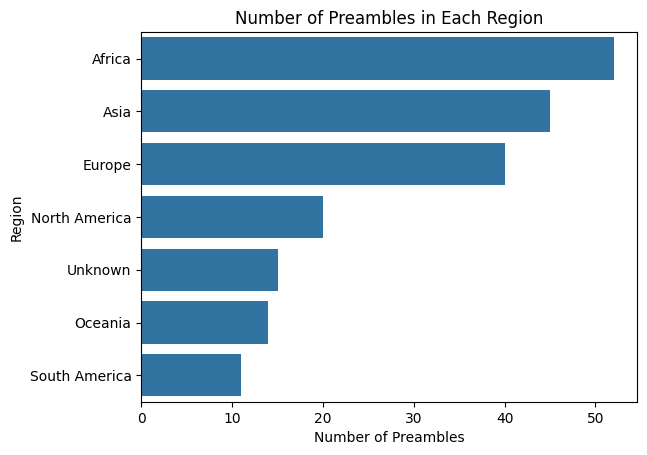

In [71]:
#Graph showing how many preambles are in each region
import matplotlib.pyplot as plt
import seaborn as sns
countplot = sns.countplot(y='Region', data=preambles, order=preambles['Region'].value_counts().index)   
countplot.set_title('Number of Preambles in Each Region')
countplot.set_xlabel('Number of Preambles')
countplot.set_ylabel('Region')
plt.show()

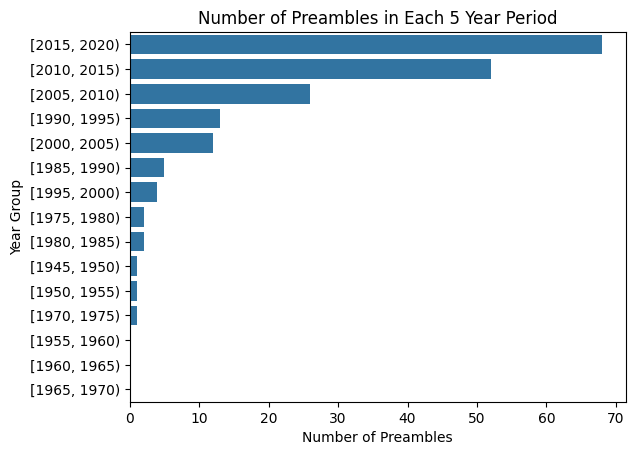

In [74]:
preambles['Year'] = preambles['Year'].str.extract('(\d+)')
preambles['Year'] = preambles['Year'].astype(int)
#Graph showing how many preambles are in each 5 year period
preambles['Year Group'] = pd.cut(preambles['Year'], bins=range(1945, 2021, 5), right=False)
countplot = sns.countplot(y='Year Group', data=preambles, order=preambles['Year Group'].value_counts().index)
countplot.set_title('Number of Preambles in Each 5 Year Period')
countplot.set_xlabel('Number of Preambles')
countplot.set_ylabel('Year Group')
plt.show()

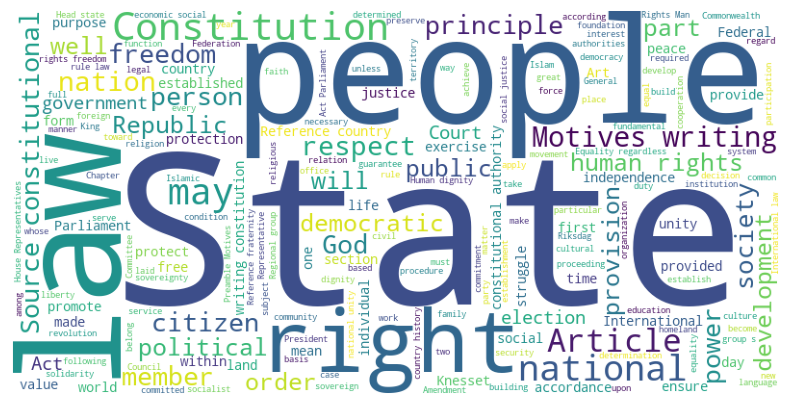

In [76]:
#find the most common words in the preambles
##this might not actaully be helpful at all but could be interesting to put in the presnetation as a more visual representation of the preambles
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(preambles['Preamble Cleaned'].astype(str)))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [77]:
#count the important words in the preambles from a predeetermined list
important_words = set([
    "peace", "security", "development", "human", "rights", "justice", "equality", "freedom", "democracy",]
) 
#now we will count the number of times each of these words appears in the preambles and save that as a new column
def count_important_words(text):
    if isinstance(text, str):
        words = text.split()
        count = sum(1 for word in words if word.lower() in important_words)
        return count
    return 0

preambles['Important Words Count'] = preambles['Preamble Cleaned'].apply(count_important_words)
preambles.head()

,Country Name,Year,Preamble,Preamble Cleaned,Region,Year Group,Important Words Count
0,Austria,2013,Chapter I General Provisions. European UnionA...,Chapter I General Provisions. European UnionA....,Europe,"[2010, 2015)",27
1,Sri Lanka,2015,"Motives for writing constitution, Source of c...","Motives writing constitution, Source constitut...",Asia,"[2015, 2020)",6
2,Tanzania,2005,"Motives for writing constitution, Preamble ...","Motives writing constitution, Preamble Preambl...",Africa,"[2005, 2010)",4
3,Bahamas,1973,"Motives for writing constitution, God or othe...","Motives writing constitution, God other deitie...",North America,"[1970, 1975)",2
4,France,2008,Preamble The French people solemnly proclaim ...,Preamble French people solemnly proclaim attac...,Europe,"[2005, 2010)",7


/var/folders/8z/cndsd0cn73j8z4x693h6wrnr0000gn/T/ipykernel_35497/2338991425.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  countplot = sns.barplot(x='Important Words Count', y='Region', data=preambles, estimator=sum, ci=None)


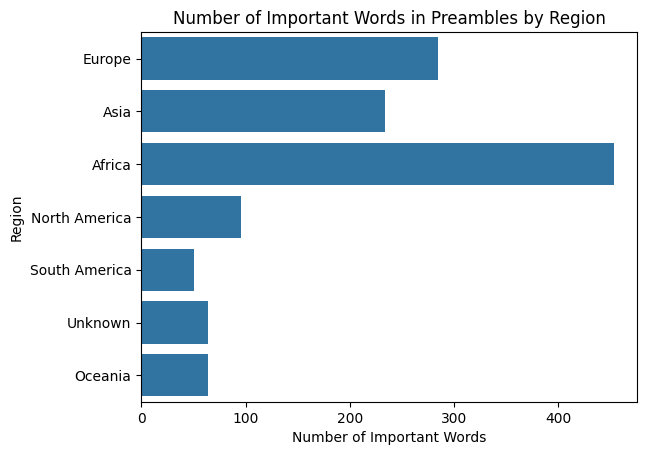

In [80]:
#graph that shows the number of important words in the preambles by region
countplot = sns.barplot(x='Important Words Count', y='Region', data=preambles, estimator=sum, ci=None)
countplot.set_title('Number of Important Words in Preambles by Region')
countplot.set_xlabel('Number of Important Words')
countplot.set_ylabel('Region')
plt.show()


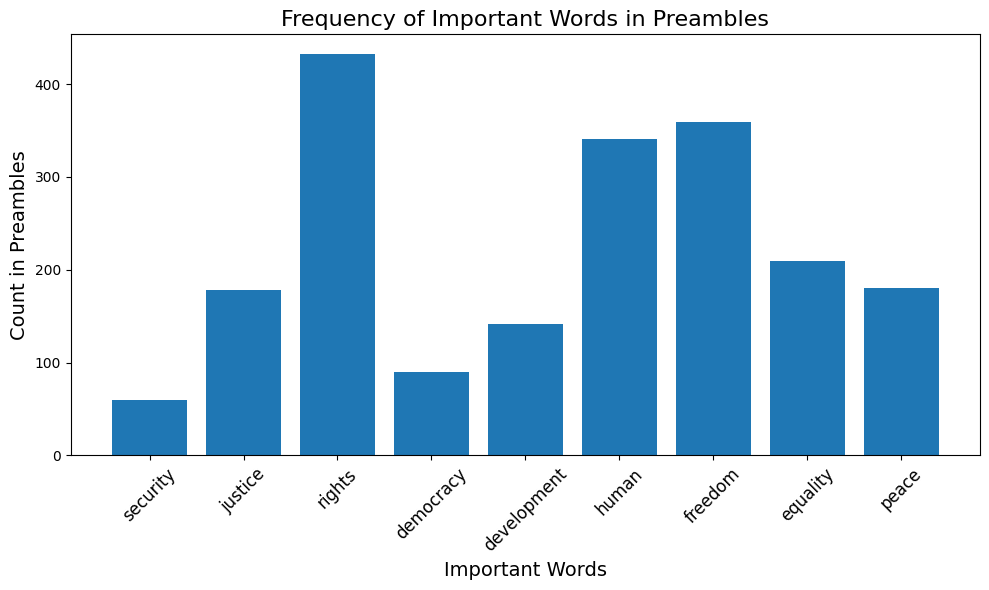

In [82]:
#graph that shows the list of important words on the x axis and the number of times they appear in the preambles on the y axis
word_counts = {word: 0 for word in important_words}

for preamble in preambles["Preamble Cleaned"].dropna():
    for word in important_words:
        word_counts[word] += preamble.lower().count(word)

# bar chart 
plt.figure(figsize=(10, 6))
plt.bar(word_counts.keys(), word_counts.values())
plt.xlabel("Important Words", fontsize=14)
plt.ylabel("Count in Preambles", fontsize=14)
plt.title("Frequency of Important Words in Preambles", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()
